In [195]:
# 先看看数据集的基本信息
import pandas as pd
import numpy as np
data = pd.read_csv("./titanic/train.csv")
test = pd.read_csv("./titanic/test.csv")
#print(data.head())

##Age 年龄
##Cabin 船舱号
##Embarked 登船港口
##Fare 票价
##Name 乘客姓名
##Parch 不同代直系亲属人数
##SibSp 同代直系亲属人数
##PassengerId 乘客ID
##Pclass 客舱等级
##Sex 性别
##Ticket 船票编号
##Survived 存活情况

In [196]:
# 删除name
data = data.drop(columns=['Name'])
test = test.drop(columns=['Name'])

In [197]:
# 首先进行数据清洗
## 缺失值处理
## 异常值处理
## 数据类型转化
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [174]:
## 缺失值处理
### 一般套路就是数值型用中位数填充，离散型用众数填充
data.info()
### 可以看出缺失值在Age，Cabin，Embarked上，后两者是分类变量，前面是数值的

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [198]:
## 对age我们用中位数填充
age=data['Age'].values.reshape(-1,1)         #取出缺失值所在列的数值，sklearn当中特征矩阵必须是二维才能传入 使用reshape(-1,1)升维

from sklearn.impute import SimpleImputer     #导入模块
imp_median=SimpleImputer(missing_values=np.nan,strategy='median')    #实例化，中值填充
imp_median=imp_median.fit_transform(age)     #fit_transform一步完成调取结果

data['Age']=imp_median       #填充好的数据传回到 data['Age']列

data['Age'].isnull().sum()   #检验是否还有空值，为0即说明空值均已被填充

## 对age我们用中位数填充
age=test['Age'].values.reshape(-1,1)         #取出缺失值所在列的数值，sklearn当中特征矩阵必须是二维才能传入 使用reshape(-1,1)升维

from sklearn.impute import SimpleImputer     #导入模块
imp_median=SimpleImputer(missing_values=np.nan,strategy='median')    #实例化，中值填充
imp_median=imp_median.fit_transform(age)     #fit_transform一步完成调取结果

test['Age']=imp_median       #填充好的数据传回到 data['Age']列

test['Age'].isnull().sum()   #检验是否还有空值，为0即说明空值均已被填充

0

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [199]:
## 对于Embarked我们用众数填充
age=data['Embarked'].values.reshape(-1,1)  #取出缺失值所在列的数值，sklearn当中特征矩阵必须是二维才能传入 使用reshape(-1,1)升维

from sklearn.impute import SimpleImputer #导入模块
imp_most_frequent=SimpleImputer(missing_values=np.nan,strategy='most_frequent')  #实例化，众数填充
imp_most_frequent=imp_most_frequent.fit_transform(age)     #fit_transform一步完成调取结果

data['Embarked']=imp_most_frequent       #填充好的数据传回到 data['Age']列

data['Embarked'].isnull().sum()          #检验是否还有空值，为0即说明空值均已被填充

## 对于test的fare我们用众数填充
fare=test['Fare'].values.reshape(-1,1)  #取出缺失值所在列的数值，sklearn当中特征矩阵必须是二维才能传入 使用reshape(-1,1)升维

from sklearn.impute import SimpleImputer #导入模块
imp_most_frequent=SimpleImputer(missing_values=np.nan,strategy='most_frequent')  #实例化，众数填充
imp_most_frequent=imp_most_frequent.fit_transform(fare)     #fit_transform一步完成调取结果

test['Fare']=imp_most_frequent       #填充好的数据传回到 data['Age']列

test['Fare'].isnull().sum()          #检验是否还有空值，为0即说明空值均已被填充

0

In [201]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [202]:
## 对于Cabin由于缺失值太多，我们这里先去掉他
data = data.drop(columns=['Cabin'])
test = test.drop(columns=['Cabin'])

In [204]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [206]:

## 下面做数据类型转换
### 数值型
data['PassengerId'] = data['PassengerId'].astype('float64')
data['Survived'] = data['Survived'].astype('float64')
data['Pclass'] = data['Pclass'].astype('float64')
data['SibSp'] = data['SibSp'].astype('float64')
data['Parch'] = data['Parch'].astype('float64')

test['PassengerId'] = test['PassengerId'].astype('float64')
# test['Survived'] = test['Survived'].astype('float64')
test['Pclass'] = test['Pclass'].astype('float64')
test['SibSp'] = test['SibSp'].astype('float64')
data['Parch'] = data['Parch'].astype('float64')

In [207]:
data['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

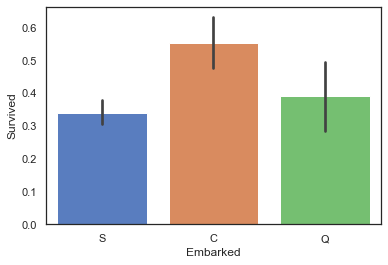

In [183]:
import seaborn as sns
#设置sns样式
sns.set(style='white',context='notebook',palette='muted')
sns.barplot(data=data,x='Embarked',y='Survived')

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

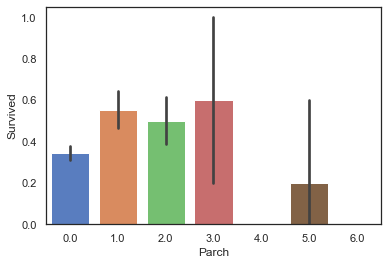

In [184]:
sns.barplot(data=data,x='Parch',y='Survived')

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

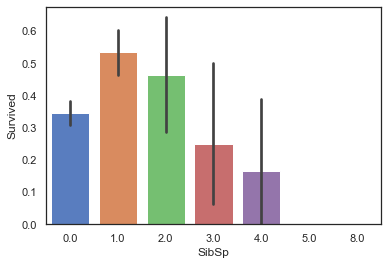

In [185]:
sns.barplot(data=data,x='SibSp',y='Survived')

In [186]:
data['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [208]:
## ticket不知道怎么处理，先去掉
data = data.drop(columns=['Ticket'])
test = test.drop(columns=['Ticket'])

In [210]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    float64
 1   Pclass       418 non-null    float64
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    float64
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 26.2+ KB


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

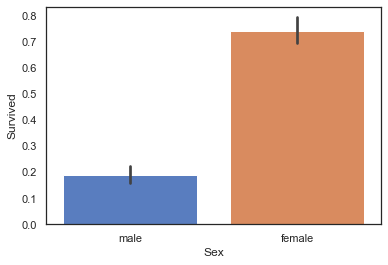

In [189]:
sns.barplot(data=data,x='Sex',y='Survived')
## 我们发现女性高于男性在幸存率

In [211]:
## 数据类型转化，只需要处理性别和Embarked就好
embark_dummies  = pd.get_dummies(data['Embarked'])
data = data.join(embark_dummies)
data = data.drop(columns=['Embarked'])
# data
embark_dummies_test  = pd.get_dummies(test['Embarked'])
test = test.join(embark_dummies_test)
test = test.drop(columns=['Embarked'])

In [212]:
sex_dummies = pd.get_dummies(data['Sex'])
data = data.join(sex_dummies)
data = data.drop(columns=['Sex'])
# data
sex_dummies_test = pd.get_dummies(test['Sex'])
test = test.join(sex_dummies_test)
test = test.drop(columns=['Sex'])

In [213]:
data.dtypes

PassengerId    float64
Survived       float64
Pclass         float64
Age            float64
SibSp          float64
Parch          float64
Fare           float64
C                uint8
Q                uint8
S                uint8
female           uint8
male             uint8
dtype: object

In [214]:
data['C'] = data['C'].astype('float64')
data['Q'] = data['Q'].astype('float64')
data['S'] = data['S'].astype('float64')
data['female'] = data['female'].astype('float64')
data['male'] = data['male'].astype('float64')

test['C'] = test['C'].astype('float64')
test['Q'] = test['Q'].astype('float64')
test['S'] = test['S'].astype('float64')
test['female'] = test['female'].astype('float64')
test['male'] = test['male'].astype('float64')

In [215]:
data = data.drop(columns=['PassengerId'])
test = test.drop(columns=['PassengerId'])
data.describe()  ## 我们通过训练集的mean 和 std对test做相同处理，保证数据集的分布一致

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.188552,0.086420,0.725028,0.352413,0.647587
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.391372,0.281141,0.446751,0.477990,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [217]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,0.0,3.0,22.0,1.0,0.0,7.2500,0.0,0.0,1.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,0.0,1.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,1.0,0.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,1.0,0.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,27.0,0.0,0.0,13.0000,0.0,0.0,1.0,0.0,1.0
887,1.0,1.0,19.0,0.0,0.0,30.0000,0.0,0.0,1.0,1.0,0.0
888,0.0,3.0,28.0,1.0,2.0,23.4500,0.0,0.0,1.0,1.0,0.0
889,1.0,1.0,26.0,0.0,0.0,30.0000,1.0,0.0,0.0,0.0,1.0


In [168]:

from sklearn.preprocessing import StandardScaler
 
#标准化，返回值为标准化后的数据｜
datax = StandardScaler().fit_transform(data.values)
datax.shape

(891, 12)

In [170]:
df = pd.DataFrame(datax)


,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.730108,-0.789272,0.827377,-0.565736,0.432793,-0.473674,-0.502445,-0.482043,-0.307562,0.615838,-0.737695,0.737695
1,-1.726220,1.266990,-1.566107,0.663861,0.432793,-0.473674,0.786845,2.074505,-0.307562,-1.623803,1.355574,-1.355574
2,-1.722332,1.266990,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,-0.482043,-0.307562,0.615838,1.355574,-1.355574
3,-1.718444,1.266990,-1.566107,0.433312,0.432793,-0.473674,0.420730,-0.482043,-0.307562,0.615838,1.355574,-1.355574
4,-1.714556,-0.789272,0.827377,0.433312,-0.474545,-0.473674,-0.486337,-0.482043,-0.307562,0.615838,-0.737695,0.737695
...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.714556,-0.789272,-0.369365,-0.181487,-0.474545,-0.473674,-0.386671,-0.482043,-0.307562,0.615838,-0.737695,0.737695
887,1.718444,1.266990,-1.566107,-0.796286,-0.474545,-0.473674,-0.044381,-0.482043,-0.307562,0.615838,1.355574,-1.355574
888,1.722332,-0.789272,0.827377,-0.104637,0.432793,2.008933,-0.176263,-0.482043,-0.307562,0.615838,1.355574,-1.355574
889,1.726220,1.266990,-1.566107,-0.258337,-0.474545,-0.473674,-0.044381,2.074505,-0.307562,-1.623803,-0.737695,0.737695
